<a href="https://colab.research.google.com/github/Mineth03/Client-Predicting/blob/Preprocessing/Models/RandomForestModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


Training Set Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     29229
           1       1.00      1.00      1.00     29230

    accuracy                           1.00     58459
   macro avg       1.00      1.00      1.00     58459
weighted avg       1.00      1.00      1.00     58459


Testing Set Report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93      7308
           1       0.93      0.93      0.93      7307

    accuracy                           0.93     14615
   macro avg       0.93      0.93      0.93     14615
weighted avg       0.93      0.93      0.93     14615

ROC-AUC Score (Test Set): 0.9751902806083257 



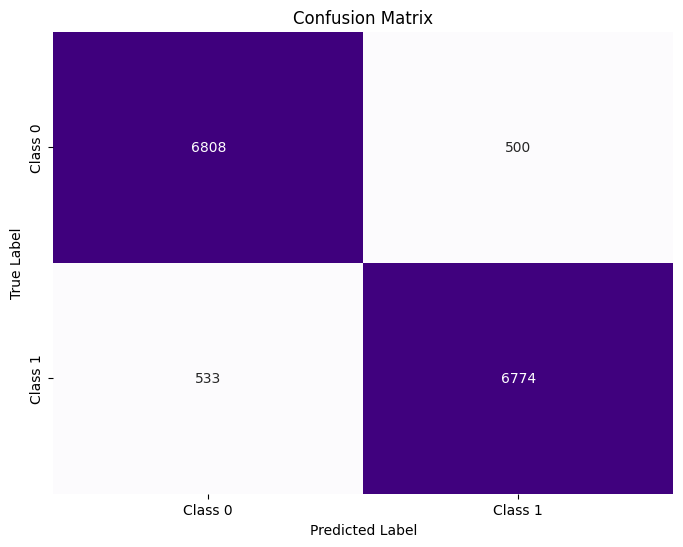

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_auc_score

# Load the dataset
data = pd.read_csv("Encoded.csv")

# Define X and y
X = data.drop(columns=["y"])
y = data["y"]

# Apply SMOTE to the entire dataset before splitting
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)

# Split the SMOTE-resampled dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42, stratify=y_smote)

# Initialize the Random Forest model
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)

# Train the model on the SMOTE-resampled training set
rf_model.fit(X_train, y_train)

# Predictions for training and testing sets
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

# Generate classification reports
train_report = classification_report(y_train, y_train_pred)
test_report = classification_report(y_test, y_test_pred)

print("Training Set Report:\n", train_report)
print("\nTesting Set Report:\n", test_report)

# ROC-AUC Score
print("ROC-AUC Score (Test Set):", roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1]), "\n")

# Generate confusion matrix for the test set
cm = confusion_matrix(y_test, y_test_pred)

# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', cbar=False,
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])

# Add labels and title
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Show the plot
plt.show()